## Load metasamples and take the Brain one.

In [1]:
import pandas as pd
import os
from os.path import join, basename
import glob
import shutil
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
samples = pd.read_csv("../parameters/samples.tsv", sep="\t", index_col=0)
samples

,Experiment,Full,Name,Tissue
CHBMDM1hKLA2_ATAC_JHS1000_SD_AGGTTGGG_S11_L001_R1_001.fastq.gz,ATAC,CHBMDM1hKLA2_ATAC_JHS1000_SD_AGGTTGGG_S11_L001...,BMDM1hKLA_ATAC1,BMDM1hKLA
CHBMDM1hKLA1_ATAC_JHS998_SD_TGGGTTTC_S9_L001_R1_001.fastq.gz,ATAC,CHBMDM1hKLA1_ATAC_JHS998_SD_TGGGTTTC_S9_L001_R...,BMDM1hKLA_ATAC2,BMDM1hKLA
CHBMDM1hKLA_GRO_JHS1027_SD_CAAAAG_S42_L003_R1_001.fastq.gz,GRO,CHBMDM1hKLA_GRO_JHS1027_SD_CAAAAG_S42_L003_R1_...,BMDM1hKLA_GRO1,BMDM1hKLA
CHBMDM1hKLA_GRO_JHS1034_SD_AGTCAA_S49_L003_R1_001.fastq.gz,GROCap,CHBMDM1hKLA_GRO_JHS1034_SD_AGTCAA_S49_L003_R1_...,BMDM1hKLA_GROCap1,BMDM1hKLA
CHBMDMVehic2_ATAC_JHS999_SD_TGGTCACA_S10_L001_R1_001.fastq.gz,ATAC,CHBMDMVehic2_ATAC_JHS999_SD_TGGTCACA_S10_L001_...,BMDMwt_ATAC1,BMDMwt
...,...,...,...,...
NL5_Liver_S5_L006_R1_001.fastq.gz,RNASeq,NL5_Liver_S5_L006_R1_001.fastq.gz,Liver_RNASeq1,Liver
NL6_Heart_S6_L006_R1_001.fastq.gz,RNASeq,NL6_Heart_S6_L006_R1_001.fastq.gz,Heart_RNASeq1,Heart
NL7_Brain2_S7_L006_R1_001.fastq.gz,RNASeq,NL7_Brain2_S7_L006_R1_001.fastq.gz,Brain_RNASeq2,Brain
NL8_Muscle_S8_L006_R1_001.fastq.gz,RNASeq,NL8_Muscle_S8_L006_R1_001.fastq.gz,Muscle_RNASeq1,Muscle


## Directory names

In [2]:
raw_head_dir = "/media/lewislab/Dropbox (UCSD SBRG)/LewisPub/Data/TSS/"
raw_dir = "/media/lewislab/Dropbox (UCSD SBRG)/LewisPub/Data/TSS/171227_hamster_GRO_mStart"
params_dir = "../parameters"
out_dir = "../Results/csRNA_pipeline/"
bam_dir = join(out_dir, "bam")
sortBam_dir = join(out_dir, "sortBam")
tag_dir = join(out_dir, "tags")
csRNA_dir = join(out_dir, 'csRNA_peaks')

if not os.path.exists(bam_dir):
    os.mkdir(bam_dir)
    
if not os.path.exists(sortBam_dir):
    os.mkdir(sortBam_dir)
    
if not os.path.exists(tag_dir):
    os.mkdir(tag_dir)
    
if not os.path.exists(csRNA_dir):
    os.mkdir(csRNA_dir)

In [3]:
import yaml
parameter_file = "../parameters/params.yaml"
with open(parameter_file,'r') as f:
    doc = yaml.load(f)

print(doc)
gtf = doc["annotation_gtf"]
ref_fa = doc["ref_fa"]
db_path = "/data/isshamie/genome/ncbi_anno_103/CriGri-PICR_STAR_db"
results = doc["results"]


{'data_folder': '/data/isshamie/TSS/NCBI_PICR_103_Processed/', 'results': '/data/isshamie/TSS/Analysis/Analysis_03302020/Results/', 'RNAseq_QC': '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/2017_12_15_hamster_Seq/fastqc/', 'RNAseq_folder': '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/2017_12_15_hamster_Seq/', 'pipeline_path': '/data/isshamie/TSS/Analysis/src/', 'tissues': 'BMDM1hKLA,BMDMwt,Brain,FemaleReproductive,Heart,Kidney,Liver,Lung,MiscOrgans,Muscle,Pancreas,Spleen,CHO', 'ref_fa': '/data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna', 'annotation': '/data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3', 'annotation_gtf': '/data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.gtf', 'mRNA_peak_file': '/data/isshamie/genome/ncbi_anno_103/mRNA_final.peak', 'mRNA_peak_150_file': '/data/isshamie/genome/ncbi_anno_103/mRNA_final_150.peak', 'tss_annotation': '/data/isshamie/genome/ncbi_anno_103/start_site_mRNA_final.tsv',

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [4]:
homer_path =  "/data2/resources/software/homer/v4.11_10242019/bin/"
os.environ['PATH'] = f"{homer_path}:{os.environ['PATH']}"
!which homer

/data2/resources/software/homer/v4.11_10242019/bin//homer


In [5]:
## 0.1 Copy raw over to outdir
def copy_to_outdir(raw_d, raw_name, out_d, out_name ):
    #raw_d = raw_d.replace(" ", "\\").replace("(", "\\").replace(")", "\\")
    raw_d = "/".join(list(map(lambda x: x.replace(" ", "\\ ").replace("(", "\\(").replace(")", "\\)"), raw_d.split("/"))))
    print(raw_d)
    cmd = f'cp {join(raw_d, raw_name)} {join(out_d, out_name+".fastq.gz")}'
    
    print(cmd)
    os.system(cmd)
    return

## 1. Trim
def trim(fastq_f):
    cmd = f"homerTools trim -3 AGATCGGAAGAGCACACGTCT -mis 2 -minMatchLength 4 -min 20 {fastq_f}"
    print(cmd)
    os.system(cmd) 
    return


## 2. Alignment (STAR)
def run_star(trim_f, name, out_f):
    bam_out = join(bam_dir, csRNA["Name"])
    cmd = f"STAR --genomeDir {db_path} --runThreadN 24 --readFilesIn {trim_f} --outFileNamePrefix {bam_out} --outSAMstrandField intronMotif --outMultimapperOrder Random --outSAMmultNmax 1 --outSAMtype BAM SortedByCoordinate --outFilterMultimapNmax 10000 --limitOutSAMoneReadBytes 10000000"
    print(cmd)
    os.system(cmd) 
    return

## 3. Tags


## 4. 

In [12]:
def run_tissue(tis, samples, out_dir):
    samples = samples[(samples["Tissue"]==tis)]
    if not ((samples["Experiment"] == "START").any() & (samples["Experiment"] == "STARTinput").any() & 
        (samples["Experiment"] == "RNASeq").any()):
            print("Not csRNA, csInput, RNASeq")
            return
        
    for ind, csRNA in samples[(samples["Tissue"]==tis) & (samples["Experiment"]=="START")].iterrows():
        copy_to_outdir(raw_dir, csRNA.name, out_d=out_dir, out_name=csRNA["Name"])
        ## csRNA trim, align index and tags
        trim(join(out_dir,  csRNA["Name"]+".fastq.gz"))
        trim_f = join(out_dir,  csRNA["Name"] + ".fastq.gz.trimmed")    
        bam_out = join(bam_dir, csRNA["Name"])
        cmd = f"STAR --genomeDir {db_path} --runThreadN 24 --readFilesIn {trim_f} --outFileNamePrefix {bam_out} --outSAMstrandField intronMotif --outMultimapperOrder Random --outSAMmultNmax 1 --outSAMtype BAM SortedByCoordinate --outFilterMultimapNmax 10000 --limitOutSAMoneReadBytes 10000000"
        print(cmd)
        os.system(cmd)      
        cmd = f"samtools index {join(bam_dir,csRNA['Name'])}Aligned.sortedByCoord.out.bam"
        print(cmd)
        os.system(cmd) 
        ## Tags
        csRNA_tag = join(tag_dir, csRNA["Name"])
        csRNA_bam = join(bam_dir, csRNA["Name"])
        cmd = f"makeTagDirectory {csRNA_tag} {csRNA_bam}Aligned.sortedByCoord.out.bam -genome {ref_fa} -single -checkGC -fragLength 150"
        print(cmd)
        os.system(cmd) 
    
    for ind2, csInput in samples[(samples["Tissue"]==tis) & (samples["Experiment"]=="STARTinput")].iterrows():
        copy_to_outdir(raw_dir, csInput.name, out_d=out_dir, out_name=csInput["Name"])
        ## csInput trim, align, index and tags
        trim(join(out_dir,  csInput["Name"]+".fastq.gz"))
        trim_f = join(out_dir,  csInput["Name"] + ".fastq.gz.trimmed")
        bam_out = join(bam_dir, csInput["Name"])
        cmd = f"STAR --genomeDir {db_path} --runThreadN 24 --readFilesIn {trim_f} --outFileNamePrefix {bam_out} --outSAMstrandField intronMotif --outMultimapperOrder Random --outSAMmultNmax 1 --outSAMtype BAM SortedByCoordinate --outFilterMultimapNmax 10000 --limitOutSAMoneReadBytes 10000000"
        print(cmd)
        os.system(cmd) 
        cmd = f"samtools index {join(bam_dir,csInput['Name'])}Aligned.sortedByCoord.out.bam"
        print(cmd)
        os.system(cmd)
        csInput_tag = join(tag_dir, csInput["Name"])
        csInput_bam = join(bam_dir, csInput["Name"])
        cmd = f"makeTagDirectory {csInput_tag} {csInput_bam}Aligned.sortedByCoord.out.bam -genome {ref_fa}  -single -checkGC -fragLength 150"
        print(cmd)
        os.system(cmd)

    
    ## Tag QC
    f = plt.figure()
    for ind, csRNA in samples[(samples["Tissue"]==tis) & (samples["Experiment"]=="START")].iterrows():
        csrna_count = pd.read_csv(join(csRNA_tag, "tagCountDistribution.txt"),sep="\t", index_col=0, dtype=float)
        csrna_count["Tag per position"] = csrna_count.index.astype(int)
        plt.scatter(np.log10(csrna_count.index),np.log10(csrna_count["Fraction of Positions"]), color="blue")#, loglog=True)
        for ind2, csInput in samples[(samples["Tissue"]==tis) & (samples["Experiment"]=="STARTinput")].iterrows():
            input_count = pd.read_csv(join(csInput_tag, "tagCountDistribution.txt"),sep="\t", index_col=0)
            input_count["Tag per position"] = input_count.index.astype(int)
            plt.scatter(np.log10(input_count.index), np.log10(input_count["Fraction of Positions"]), color="orange")#, loglog=True)    

    f = plt.figure()
    for ind, csRNA in samples[(samples["Tissue"]==tis) & (samples["Experiment"]=="START")].iterrows():         
        csrna_length = pd.read_csv(join(csRNA_tag, "tagLengthDistribution.txt"),sep="\t", index_col=0, dtype=float)
        csrna_length["Read Length"] = csrna_length.index.astype(int)
        plt.scatter(csrna_length.index,csrna_length["Fraction of Tags"], color="blue")
        for ind2, csInput in samples[(samples["Tissue"]==tis) & (samples["Experiment"]=="STARTinput")].iterrows():
            input_length = pd.read_csv(join(csInput_tag, "tagLengthDistribution.txt"),sep="\t", index_col=0)
            input_length["Read Length"] = input_length.index.astype(int)
            plt.scatter(input_length.index,input_length["Fraction of Tags"], color="orange")
    plt.xlabel("Read length")
    plt.ylabel("Fraction of Tags")
            
    ## findcsRNATSS peaks
    for ind, csRNA in samples[(samples["Tissue"]==tis) & (samples["Experiment"]=="START")].iterrows():         
        for ind2, csInput in samples[(samples["Tissue"]==tis) & (samples["Experiment"]=="STARTinput")].iterrows():
            for ind3, rnaSeq in samples[(samples["Tissue"]==tis) & (samples["Experiment"]=="RNASeq")].iterrows():    
                print(csRNA.name, "\n", csInput.name,"\n", rnaSeq.name)   
                ## findCSRNA
                name = samples[(samples["Experiment"] == "RNASeq") & (samples["Tissue"] == tis)]["Full"]
                name = name[0].replace(".fastq.gz","").split("_")[1].split("-")[0]
                RNA_tag = glob.glob(join(doc["data_folder"],"RNAseq",'tags',"*"+name+"*"))[0]#name))[0]

                rnaSeq["Name"].split("_")[1]
                out_name = '%s_%s_%s_%s' % (tis,csRNA["Name"].split("_")[1],csInput["Name"].split("_")[1],rnaSeq["Name"].split("_")[1])

                out_f = os.path.join(csRNA_dir,out_name)
                cmd = f'findcsRNATSS.pl {csRNA_tag} -i {csInput_tag} -rna {RNA_tag} -gtf {gtf} -genome {ref_fa} -cpu 30 -o {out_f}'
                print(cmd)
                os.system(cmd)
    return

BMDM1hKLA
Not csRNA, csInput, RNASeq
BMDMwt
Not csRNA, csInput, RNASeq
Brain
CHO
Not csRNA, csInput, RNASeq
FemaleReproductive
Not csRNA, csInput, RNASeq
Heart
/media/lewislab/Dropbox\ \(UCSD\ SBRG\)/LewisPub/Data/TSS/171227_hamster_GRO_mStart
cp /media/lewislab/Dropbox\ \(UCSD\ SBRG\)/LewisPub/Data/TSS/171227_hamster_GRO_mStart/CHHeart_mSTART_JHS1056_SD_ATGAGC_S78_L004_R1_001.fastq.gz ../Results/csRNA_pipeline/Heart_START1.fastq.gz
homerTools trim -3 AGATCGGAAGAGCACACGTCT -mis 2 -minMatchLength 4 -min 20 ../Results/csRNA_pipeline/Heart_START1.fastq.gz
STAR --genomeDir /data/isshamie/genome/ncbi_anno_103/CriGri-PICR_STAR_db --runThreadN 24 --readFilesIn ../Results/csRNA_pipeline/Heart_START1.fastq.gz.trimmed --outFileNamePrefix ../Results/csRNA_pipeline/bam/Heart_START1 --outSAMstrandField intronMotif --outMultimapperOrder Random --outSAMmultNmax 1 --outSAMtype BAM SortedByCoordinate --outFilterMultimapNmax 10000 --limitOutSAMoneReadBytes 10000000
samtools index ../Results/csRNA_pipeli

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10
/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10


CHHeart_mSTART_JHS1056_SD_ATGAGC_S78_L004_R1_001.fastq.gz 
 CHHeart_mSTARTinput_JHS1077_SD_ATGAGC_S99_L005_R1_001.fastq.gz 
 NL6_Heart_S6_L006_R1_001.fastq.gz
findcsRNATSS.pl ../Results/csRNA_pipeline/tags/Heart_START2 -i ../Results/csRNA_pipeline/tags/Heart_STARTinput1 -rna /data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/tags/Heart_S6 -gtf /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.gtf -genome /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -cpu 30 -o ../Results/csRNA_pipeline/csRNA_peaks/Heart_START1_STARTinput1_RNASeq1
CHHeart_mSTART_JHS1013_SD_AGTTCC_S25_L002_R1_001.fastq.gz 
 CHHeart_mSTARTinput_JHS1077_SD_ATGAGC_S99_L005_R1_001.fastq.gz 
 NL6_Heart_S6_L006_R1_001.fastq.gz
findcsRNATSS.pl ../Results/csRNA_pipeline/tags/Heart_START2 -i ../Results/csRNA_pipeline/tags/Heart_STARTinput1 -rna /data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/tags/Heart_S6 -gtf /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_geno

STAR --genomeDir /data/isshamie/genome/ncbi_anno_103/CriGri-PICR_STAR_db --runThreadN 24 --readFilesIn ../Results/csRNA_pipeline/Liver_STARTinput1.fastq.gz.trimmed --outFileNamePrefix ../Results/csRNA_pipeline/bam/Liver_STARTinput1 --outSAMstrandField intronMotif --outMultimapperOrder Random --outSAMmultNmax 1 --outSAMtype BAM SortedByCoordinate --outFilterMultimapNmax 10000 --limitOutSAMoneReadBytes 10000000
samtools index ../Results/csRNA_pipeline/bam/Liver_STARTinput1Aligned.sortedByCoord.out.bam
makeTagDirectory ../Results/csRNA_pipeline/tags/Liver_STARTinput1 ../Results/csRNA_pipeline/bam/Liver_STARTinput1Aligned.sortedByCoord.out.bam -genome /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna  -single -checkGC -fragLength 150
CHLiver_mSTART_JHS1055_SD_ACTGAT_S77_L004_R1_001.fastq.gz 
 CHLiver_mSTARTinput_JHS1076_SD_ACTGAT_S98_L005_R1_001.fastq.gz 
 NL5_Liver_S5_L006_R1_001.fastq.gz
findcsRNATSS.pl ../Results/csRNA_pipeline/tags/Liver_START2 -i ../Results/c

STAR --genomeDir /data/isshamie/genome/ncbi_anno_103/CriGri-PICR_STAR_db --runThreadN 24 --readFilesIn ../Results/csRNA_pipeline/Muscle_START2.fastq.gz.trimmed --outFileNamePrefix ../Results/csRNA_pipeline/bam/Muscle_START2 --outSAMstrandField intronMotif --outMultimapperOrder Random --outSAMmultNmax 1 --outSAMtype BAM SortedByCoordinate --outFilterMultimapNmax 10000 --limitOutSAMoneReadBytes 10000000
samtools index ../Results/csRNA_pipeline/bam/Muscle_START2Aligned.sortedByCoord.out.bam
makeTagDirectory ../Results/csRNA_pipeline/tags/Muscle_START2 ../Results/csRNA_pipeline/bam/Muscle_START2Aligned.sortedByCoord.out.bam -genome /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -single -checkGC -fragLength 150
/media/lewislab/Dropbox\ \(UCSD\ SBRG\)/LewisPub/Data/TSS/171227_hamster_GRO_mStart
cp /media/lewislab/Dropbox\ \(UCSD\ SBRG\)/LewisPub/Data/TSS/171227_hamster_GRO_mStart/CHMuscle_mSTARTinput_JHS1079_SD_CAAAAG_S101_L005_R1_001.fastq.gz ../Results/csRNA_pi

homerTools trim -3 AGATCGGAAGAGCACACGTCT -mis 2 -minMatchLength 4 -min 20 ../Results/csRNA_pipeline/Spleen_START1.fastq.gz
STAR --genomeDir /data/isshamie/genome/ncbi_anno_103/CriGri-PICR_STAR_db --runThreadN 24 --readFilesIn ../Results/csRNA_pipeline/Spleen_START1.fastq.gz.trimmed --outFileNamePrefix ../Results/csRNA_pipeline/bam/Spleen_START1 --outSAMstrandField intronMotif --outMultimapperOrder Random --outSAMmultNmax 1 --outSAMtype BAM SortedByCoordinate --outFilterMultimapNmax 10000 --limitOutSAMoneReadBytes 10000000
samtools index ../Results/csRNA_pipeline/bam/Spleen_START1Aligned.sortedByCoord.out.bam
makeTagDirectory ../Results/csRNA_pipeline/tags/Spleen_START1 ../Results/csRNA_pipeline/bam/Spleen_START1Aligned.sortedByCoord.out.bam -genome /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -single -checkGC -fragLength 150
/media/lewislab/Dropbox\ \(UCSD\ SBRG\)/LewisPub/Data/TSS/171227_hamster_GRO_mStart
cp /media/lewislab/Dropbox\ \(UCSD\ SBRG\)/Lewis

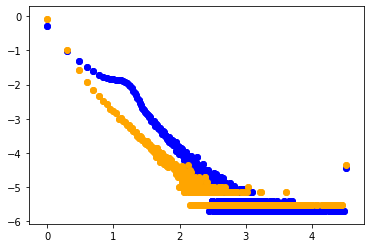

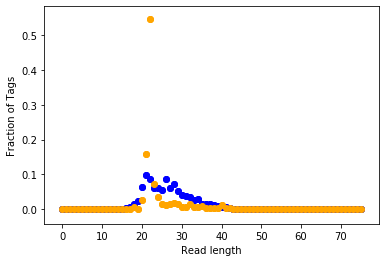

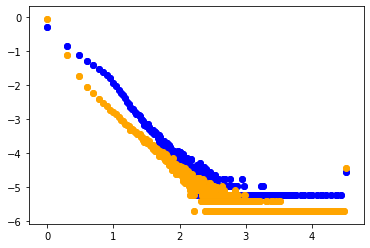

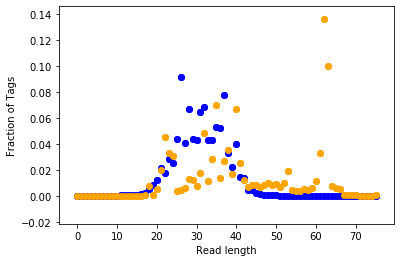

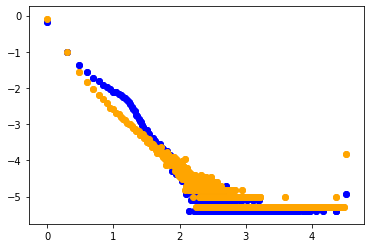

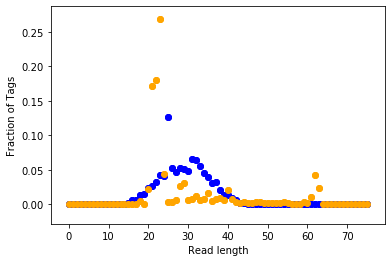

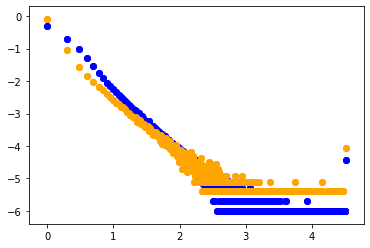

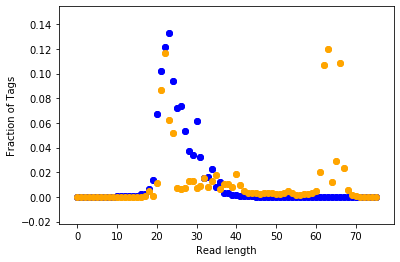

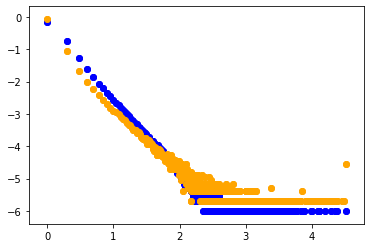

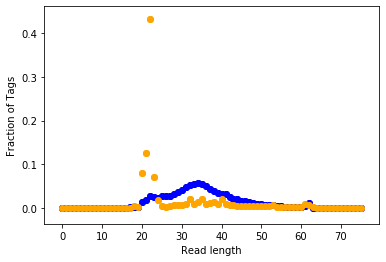

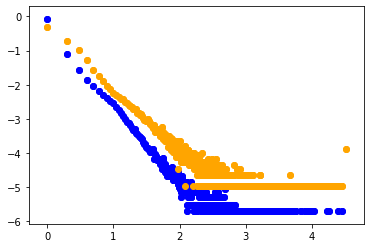

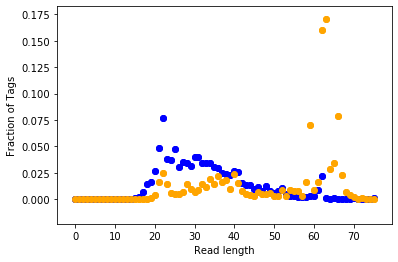

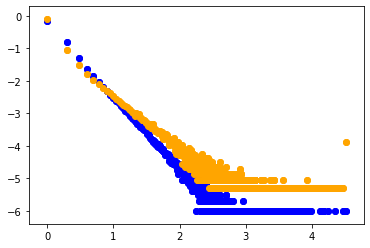

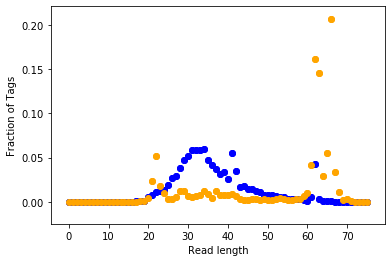

In [13]:
for tis, df in samples.groupby("Tissue"):
    print(tis)
    if tis == "Brain":
        continue
    run_tissue(tis, samples, out_dir)